# IBM Employee Attrition Analysis and Prediction

# Introduction
Attrition is a problem that impacts all businesses, irrespective of geography, industry and size of the company. Employee attrition leads to significant costs for a business, including the cost of business disruption, hiring new staff and training new staff. As such, there is great business interest in understanding the drivers of, and minimizing staff attrition. Let us therefore turn to our predictive modelling capabilities and see if we can predict employee attrition on this IBM dataset.

This notebook is structured as follows:

1. **Exploratory Data Analysis:** In this section, we explore the dataset by taking a look at the feature distributions, how correlated one feature is to the other and create some Seaborn and Plotly visualisations
2. **Feature Engineering and Categorical Encoding:** Conduct some feature engineering as well as encode all our categorical features into dummy variables
3. **Implementing Machine Learning models:** We implement a Random Forest and a Gradient Boosted Model after which we look at feature importances from these respective models

Let's Go.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Exploratory Data Analysis

In [2]:
attrition = pd.read_csv("../input/employee/train.csv")

In [3]:
attrition.head() #Top 5 Records

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Data quality checks**

To look for any null values, we can just invoke the **isnull** call as follows

In [4]:
attrition.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [5]:
attrition.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

**For Futhur Analysis we can seperate the numerical and categorical columns**

In [6]:
categorical = attrition.select_dtypes(include = 'object')
print(categorical.columns)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [7]:
numerical = attrition.select_dtypes(include=['float64','int64'])

In [8]:
print((numerical.columns))

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


### Distribution of the dataset

Generally one of the first few steps in exploring the data would be to have a rough idea of how the features are distributed with one another. To do so, I shall invoke the familiar **kdeplot** function from the Seaborn plotting library and this generates bivariate plots as follows:

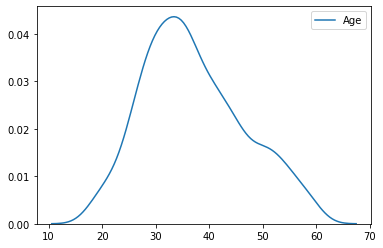

In [9]:
sns.kdeplot(attrition['Age'])

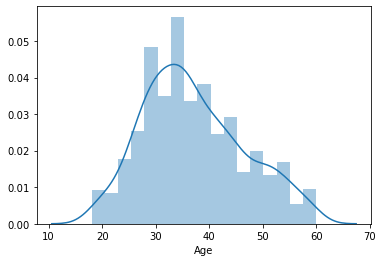

In [10]:
sns.distplot(attrition['Age'])

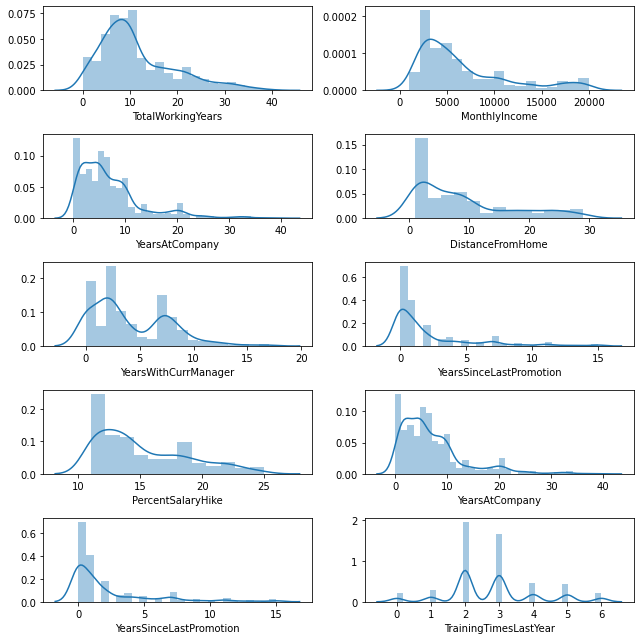

In [11]:
fig, ax = plt.subplots(5,2, figsize=(9,9))
sns.distplot(attrition['TotalWorkingYears'], ax = ax[0,0])
sns.distplot(attrition['MonthlyIncome'], ax = ax[0,1])
sns.distplot(attrition['YearsAtCompany'], ax = ax[1,0])
sns.distplot(attrition['DistanceFromHome'], ax = ax[1,1])
sns.distplot(attrition['YearsWithCurrManager'], ax = ax[2,0])
sns.distplot(attrition['YearsSinceLastPromotion'], ax = ax[2,1])
sns.distplot(attrition['PercentSalaryHike'], ax = ax[3,0])
sns.distplot(attrition['YearsAtCompany'], ax = ax[3,1])
sns.distplot(attrition['YearsSinceLastPromotion'], ax = ax[4,0])
sns.distplot(attrition['TrainingTimesLastYear'], ax = ax[4,1])
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


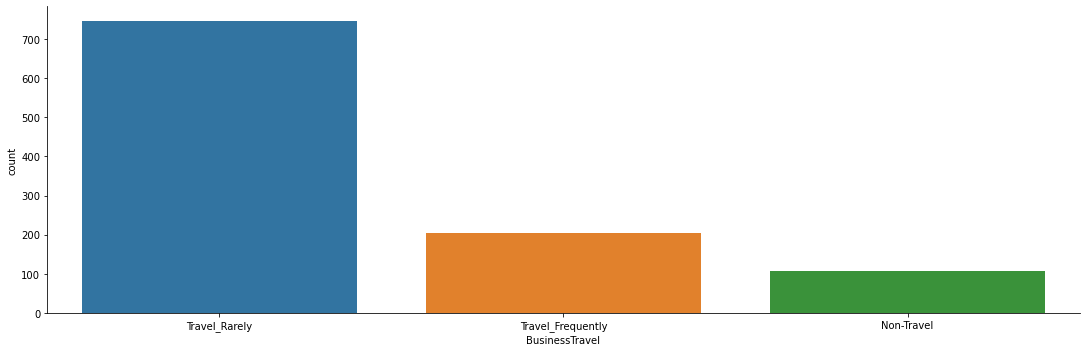

In [12]:
sns.factorplot(data = attrition, kind = 'count', aspect = 3, size = 5, x = 'BusinessTravel')

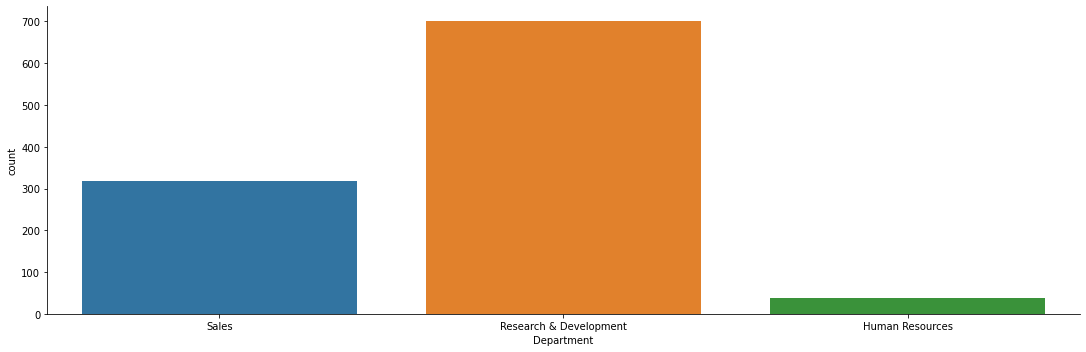

In [13]:
sns.factorplot(data = attrition, kind = 'count', aspect = 3, size = 5, x = 'Department')

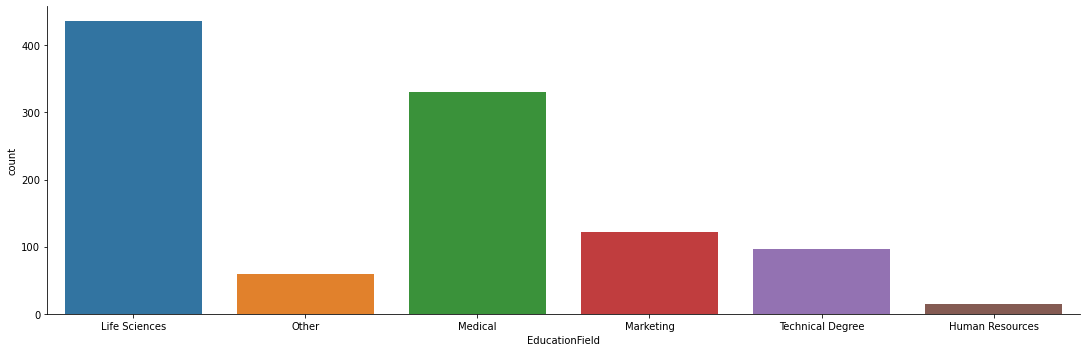

In [14]:
sns.factorplot(data = attrition, kind = 'count', aspect = 3, size = 5, x = 'EducationField')

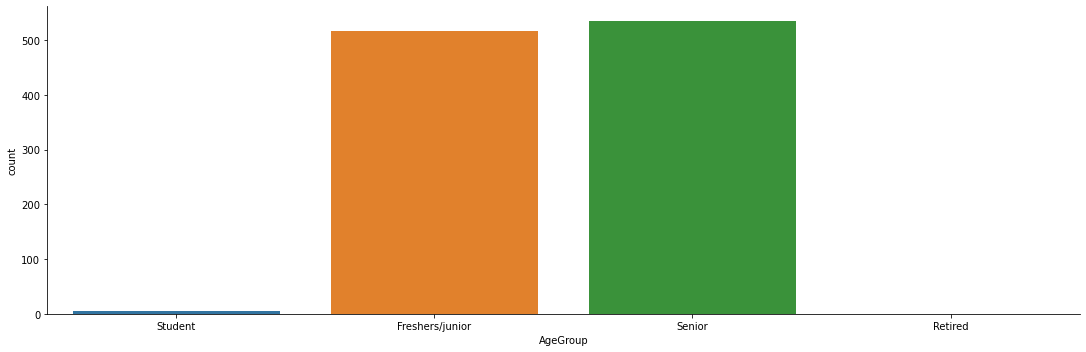

In [15]:
bins = [0, 18, 35, 60, np.inf]
labels = ['Student', 'Freshers/junior', 'Senior', 'Retired']
attrition['AgeGroup'] = pd.cut(attrition["Age"], bins, labels = labels)
sns.factorplot(data = attrition, kind = 'count', aspect = 3, size = 5, x = 'AgeGroup')

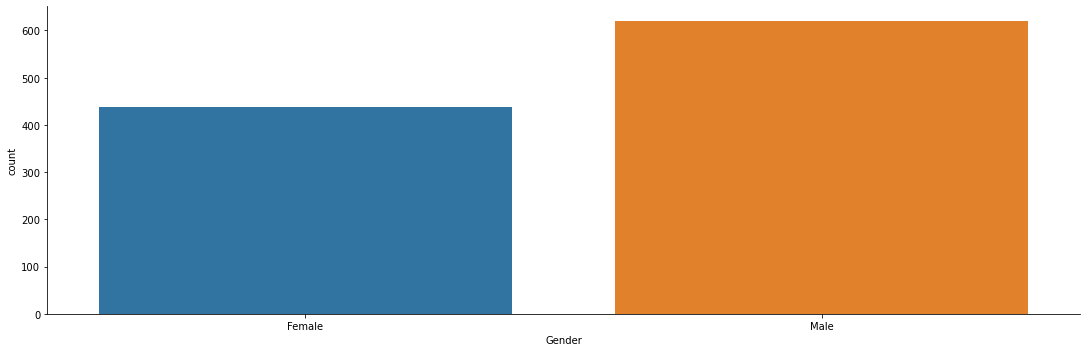

In [16]:
sns.factorplot(data = attrition, kind = 'count', aspect = 3, size = 5, x = 'Gender')

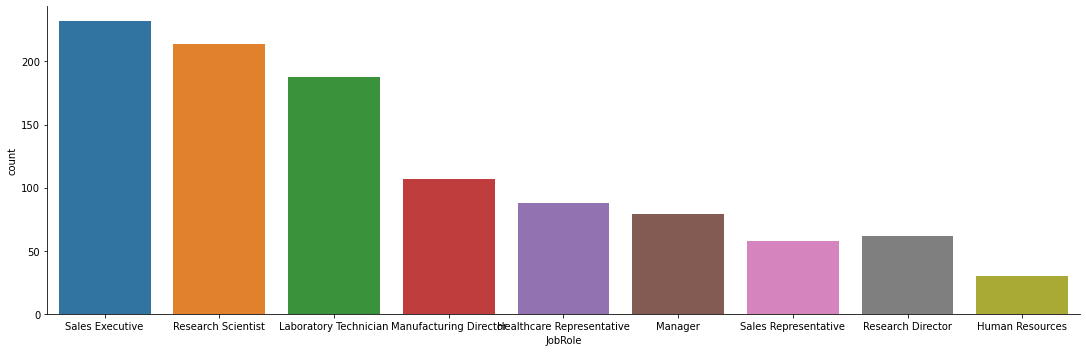

In [17]:
sns.factorplot(data = attrition, kind = 'count', aspect = 3, size = 5, x = 'JobRole')

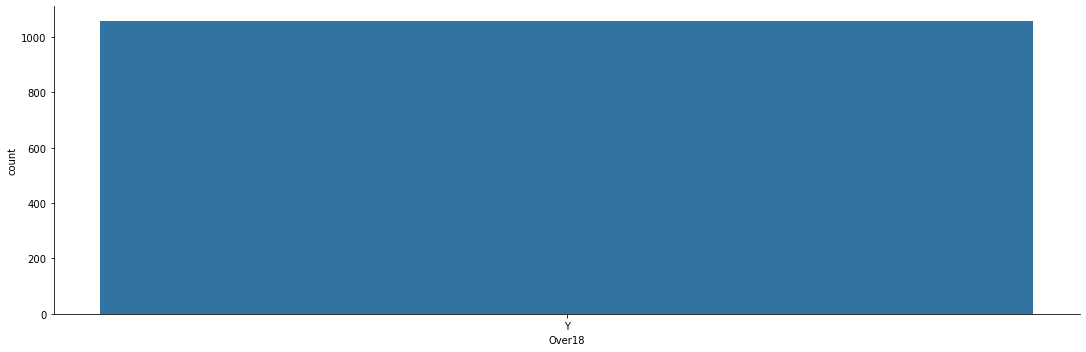

In [18]:
sns.factorplot(data = attrition, kind = 'count', aspect = 3, size = 5, x = 'Over18')

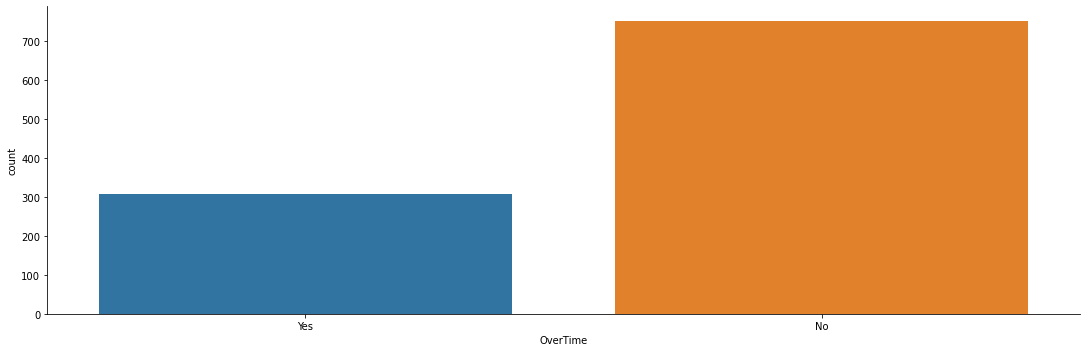

In [19]:
sns.factorplot(data = attrition, kind = 'count', aspect = 3, size = 5, x = 'OverTime')

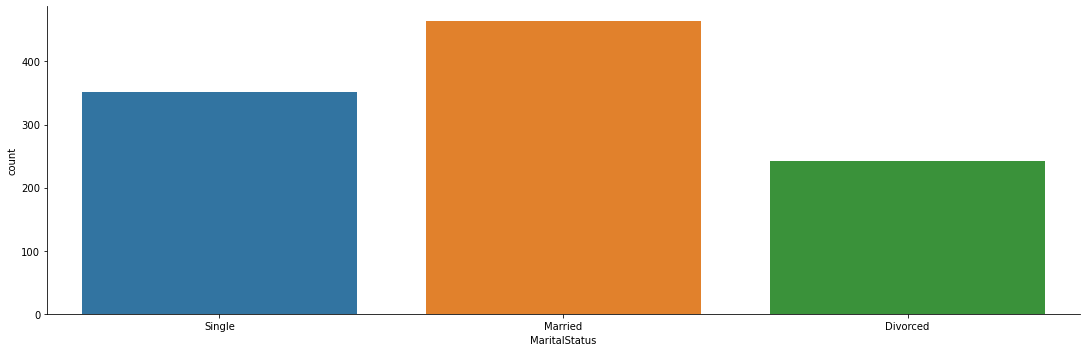

In [20]:
sns.factorplot(data = attrition, kind = 'count', aspect = 3, size = 5, x = 'MaritalStatus')

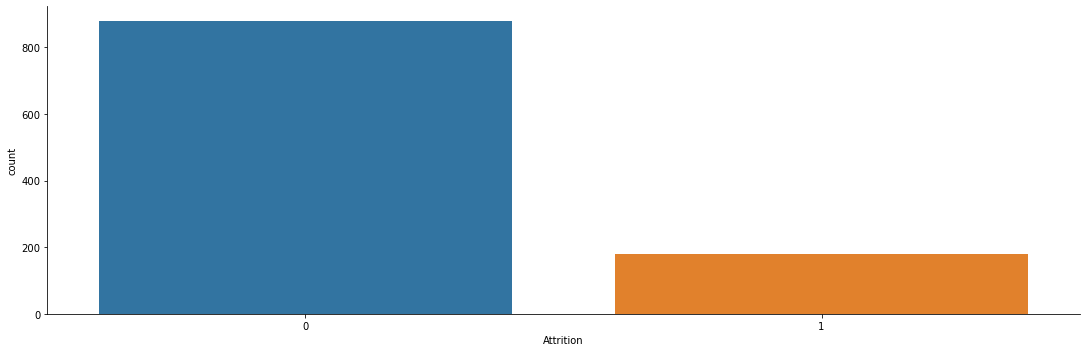

In [21]:
sns.factorplot(data = attrition, kind = 'count', aspect = 3, size = 5, x = 'Attrition')

### Correlation of Features

The next tool in a data explorer's arsenal is that of a correlation matrix. By plotting a correlation matrix, we have a very nice overview of how the features are related to one another. For a Pandas dataframe, we can conveniently use the call **.corr** which by default provides the Pearson Correlation values of the columns pairwise in that dataframe.

In this correlation plot, I will use the the Plotly library to produce a interactive Pearson correlation matrix via the Heatmap function as follows:

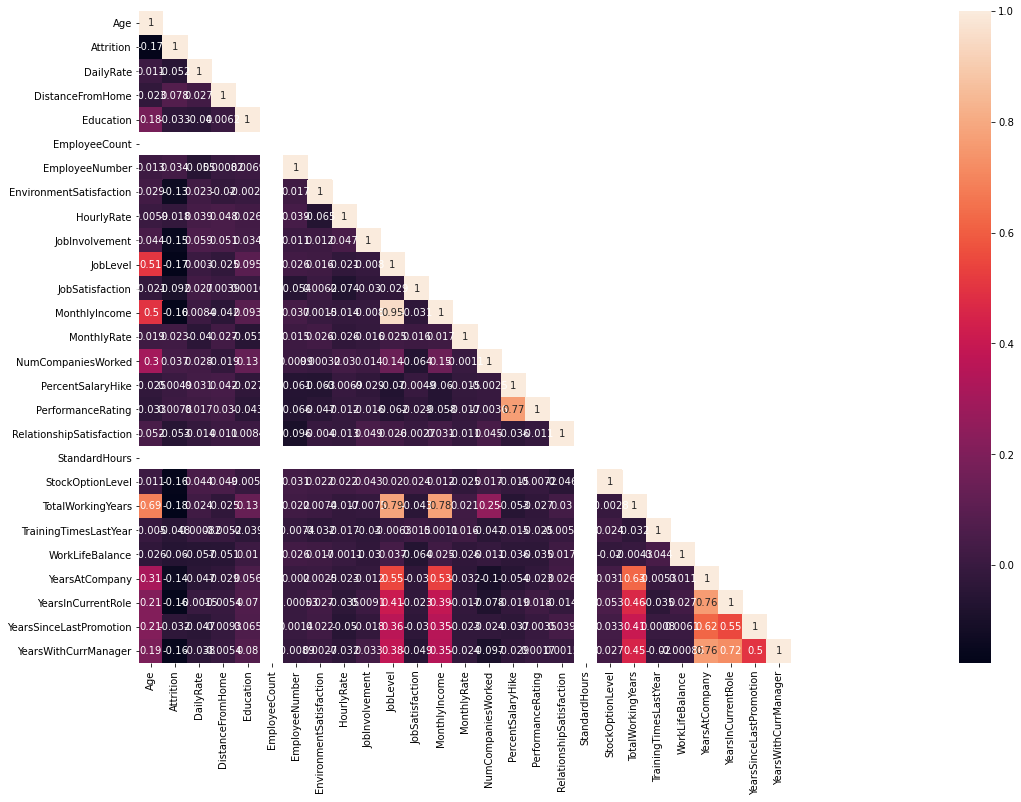

In [22]:
cor_mat = attrition.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(60,12)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)

In [23]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AgeGroup'],
      dtype='object')

In [24]:
continious = ['Age',  'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany' ]

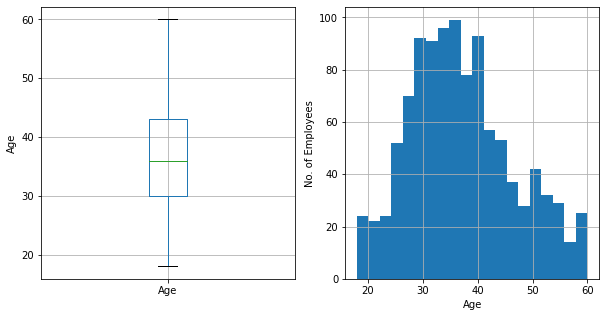

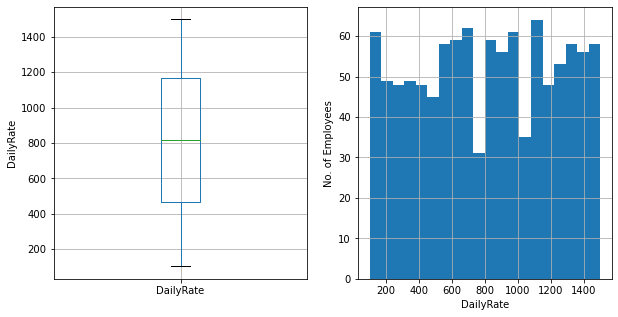

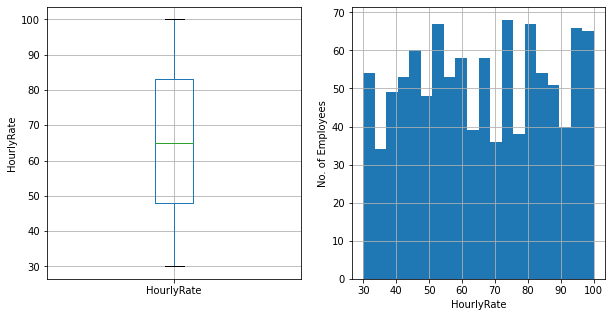

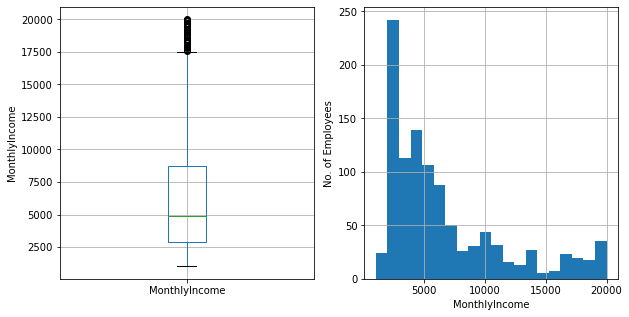

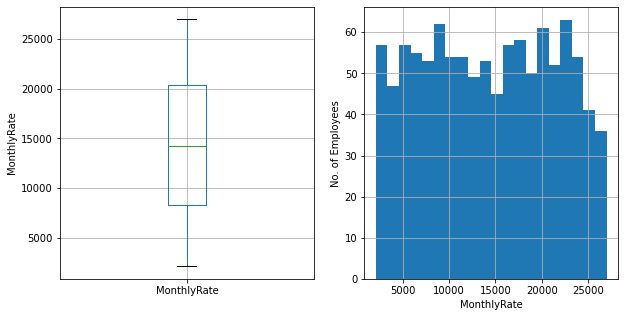

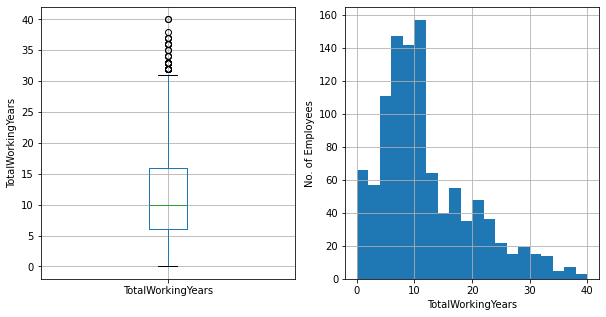

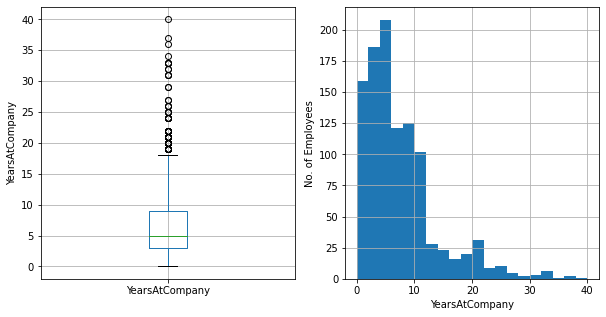

In [25]:
for var in continious:
    #boxplot
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    fig = attrition.boxplot(column = var)
    fig.set_ylabel(var)
    
    #histogram
    plt.subplot(1,2,2)
    fig = attrition[var].hist(bins = 20)
    fig.set_ylabel('No. of Employees')
    fig.set_xlabel(var)
    
    plt.show()
    

In [26]:
categorical.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [27]:
attrition_cat = pd.get_dummies(categorical)

In [28]:
attrition_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


In [29]:
numerical.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2


In [30]:
attrition_final = pd.concat([numerical,attrition_cat], axis=1)

In [31]:
attrition_final.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


In [32]:
attrition_final = attrition_final.drop('Attrition', axis = 1)

In [33]:
attrition_final

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,57,405,1,2,1,1483,2,93,4,2,...,0,1,0,0,0,1,0,1,1,0
1054,49,1490,7,4,1,1484,3,35,3,3,...,0,0,0,0,1,0,0,1,1,0
1055,34,829,15,3,1,1485,2,71,3,4,...,1,0,0,0,1,0,0,1,1,0
1056,28,1496,1,3,1,1486,1,92,3,1,...,0,0,0,1,0,1,0,1,1,0


In [34]:
target = attrition['Attrition']

Build Basline Models

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(attrition_final ,target, test_size = 0.2, random_state = 0)

In [37]:
x_train.shape

(846, 55)

In [38]:
x_test.shape

(212, 55)

In [39]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
model_predictions = model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8915094339622641
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       182
           1       1.00      0.23      0.38        30

    accuracy                           0.89       212
   macro avg       0.94      0.62      0.66       212
weighted avg       0.90      0.89      0.86       212



In [40]:
model = LogisticRegression()
model.fit(x_train,y_train)
model_predictions = model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8632075471698113
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       182
           1       1.00      0.03      0.06        30

    accuracy                           0.86       212
   macro avg       0.93      0.52      0.50       212
weighted avg       0.88      0.86      0.80       212



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
model_predictions = model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.7783018867924528
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       182
           1       0.27      0.33      0.30        30

    accuracy                           0.78       212
   macro avg       0.58      0.59      0.58       212
weighted avg       0.80      0.78      0.79       212



In [42]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
model_predictions = model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8254716981132075
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       182
           1       0.18      0.07      0.10        30

    accuracy                           0.83       212
   macro avg       0.52      0.51      0.50       212
weighted avg       0.76      0.83      0.79       212



In [43]:
model = SVC()
model.fit(x_train,y_train)
model_predictions = model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8584905660377359
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       182
           1       0.00      0.00      0.00        30

    accuracy                           0.86       212
   macro avg       0.43      0.50      0.46       212
weighted avg       0.74      0.86      0.79       212



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
oversampler = SMOTE(random_state = 12)
smote_train, smote_target = oversampler.fit_sample(x_train,y_train)

In [46]:
smote_train.shape

(1394, 55)

In [47]:
model = RandomForestClassifier()
model.fit(smote_train,smote_target)
model_predictions = model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.9150943396226415
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       182
           1       0.88      0.47      0.61        30

    accuracy                           0.92       212
   macro avg       0.90      0.73      0.78       212
weighted avg       0.91      0.92      0.90       212

